## Title:
## 🔹 Polycystic Ovary Syndrome (PCOS) Prediction Project

## 📌 Project Description:
### Dataset Used
I chose the "PCOS Dataset" from Kaggle, which contains anonymized clinical and diagnostic data for women, including whether or not they were diagnosed with PCOS. The dataset involves a classification task, where the goal is to predict the presence of PCOS based on various medical and physical indicators.

### Why This Project?
Polycystic Ovary Syndrome (PCOS) is a common but underdiagnosed condition that affects hormonal levels in women. Early prediction can help in timely treatment and lifestyle adjustments. I found this problem compelling due to its real-world impact in healthcare and the opportunity to work with clinical features — a practical domain for machine learning applications.

## Steps Taken
### 1. Data Preprocessing
- No missing values were found in the dataset — all features were complete, so no imputation or row removal was needed.

- Standardized continuous variables like BMI and hormone levels using StandardScaler to ensure consistent feature scaling.

- All features were numerical, so no encoding was necessary.

### 2. Feature Engineering
Since BMI was already present and no derived features were strictly necessary, I focused on:

- Checking for multicollinearity using a correlation heatmap

- Verifying the distribution of features by class using boxplots and histograms.

### 3. Data Visualization
To better understand the relationships:

- Created a Heatmap of correlation matrix to identify highly correlated features.
The heatmap suggests that Menstrual Irregularity and BMI are relatively important factors in PCOS diagnosis, while Age may have a minor influence.

- Box plot comparing testosterone levels in patients with and without Polycystic Ovary Syndrome (PCOS). 

- Histograms for BMI, Age distribution across classes.

- Scatter plot illustrating the relationship between testosterone levels and antral follicle count in individuals. 
The Scatter plot indicates that individuals with PCOS tend to have a higher antral follicle count, but there's no clear correlation between testosterone levels and antral follicle count.

- A bar graph that illustrates the relationship between menstrual irregularity and PCOS (Polycystic Ovary Syndrome) diagnosis. indicating that individuals with irregular menstrual cycles are more likely to be diagnosed with PCOS.

These visualizations helped identify key contributing factors to PCOS (e.g., high AMH and BMI).

### 4. Model Selection
Given it’s a binary classification task, I compared a few models:

Logistic Regression

Random Forest

XGBoost

Support Vector Machine (SVM)

I chose Random Forest as my primary model because:

It handles feature interactions and non-linearities well.

It provides feature importance which aids interpretability.


### 5. Model Evaluation
Used an 80/20 train-test split.

Model Used: Random Forest Classifier

Accuracy: 99.0%


## Challenges & Solutions
The dataset was clean and complete, requiring no imputation or row removal.

## Conclusion
The PCOS prediction model shows promising performance and could be used as a supportive diagnostic tool. This project taught me a lot about handling real-world medical data, feature engineering in the health domain, and balancing precision vs recall in critical applications.



## Import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Import dataset

In [5]:
df = pd.read_csv('pcos_dataset.csv')

In [28]:
df.head()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,24,34.7,1,25.2,20,0
1,37,26.4,0,57.1,25,0
2,32,23.6,0,92.7,28,0
3,28,28.8,0,63.1,26,0
4,25,22.1,1,59.8,8,0


In [7]:
df.tail()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
995,34,18.4,1,95.7,23,0
996,45,28.9,1,28.5,7,0
997,37,28.3,0,32.4,28,0
998,41,27.3,0,95.6,9,0
999,22,21.9,1,78.9,7,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   BMI                        1000 non-null   float64
 2   Menstrual_Irregularity     1000 non-null   int64  
 3   Testosterone_Level(ng/dL)  1000 non-null   float64
 4   Antral_Follicle_Count      1000 non-null   int64  
 5   PCOS_Diagnosis             1000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 47.0 KB


In [9]:
df.describe()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,31.771000,26.38700,0.530000,60.159500,17.469000,0.199000
std,8.463462,4.93554,0.499349,23.160204,7.069301,0.399448
min,18.000000,18.10000,0.000000,20.000000,5.000000,0.000000
25%,24.000000,21.90000,0.000000,41.700000,12.000000,0.000000
50%,32.000000,26.40000,1.000000,60.000000,18.000000,0.000000
75%,39.000000,30.50000,1.000000,80.300000,23.250000,0.000000
max,45.000000,35.00000,1.000000,99.800000,29.000000,1.000000


In [10]:
df.isnull().sum()

Age                          0
BMI                          0
Menstrual_Irregularity       0
Testosterone_Level(ng/dL)    0
Antral_Follicle_Count        0
PCOS_Diagnosis               0
dtype: int64

In [14]:
df.corr() #To find the correlation between the features

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
Age,1.000000,-0.049455,0.032300,-0.050129,0.017841,-0.064675
BMI,-0.049455,1.000000,0.031189,0.003811,0.030724,0.377852
Menstrual_Irregularity,0.032300,0.031189,1.000000,0.042694,0.035851,0.469376
Testosterone_Level(ng/dL),-0.050129,0.003811,0.042694,1.000000,0.011976,0.200817
Antral_Follicle_Count,0.017841,0.030724,0.035851,0.011976,1.000000,0.192014
PCOS_Diagnosis,-0.064675,0.377852,0.469376,0.200817,0.192014,1.000000


In [16]:
df.duplicated().sum()

0

In [13]:
df.columns

Index(['Age', 'BMI', 'Menstrual_Irregularity', 'Testosterone_Level(ng/dL)',
       'Antral_Follicle_Count', 'PCOS_Diagnosis'],
      dtype='object')

# Data visualizations

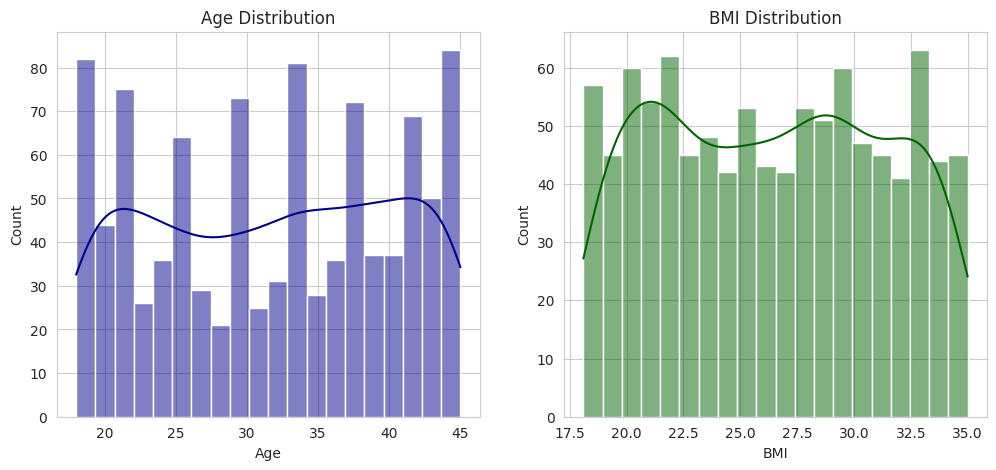

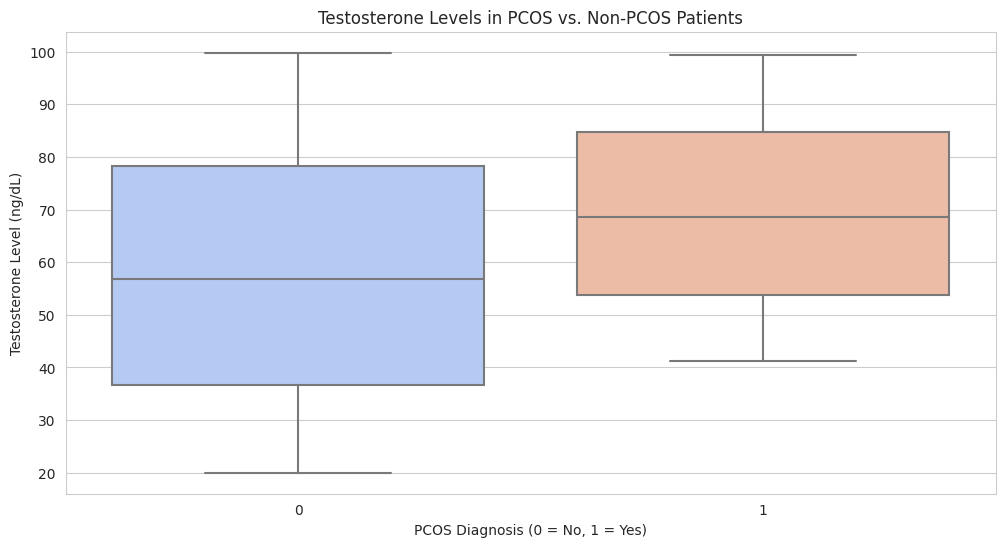

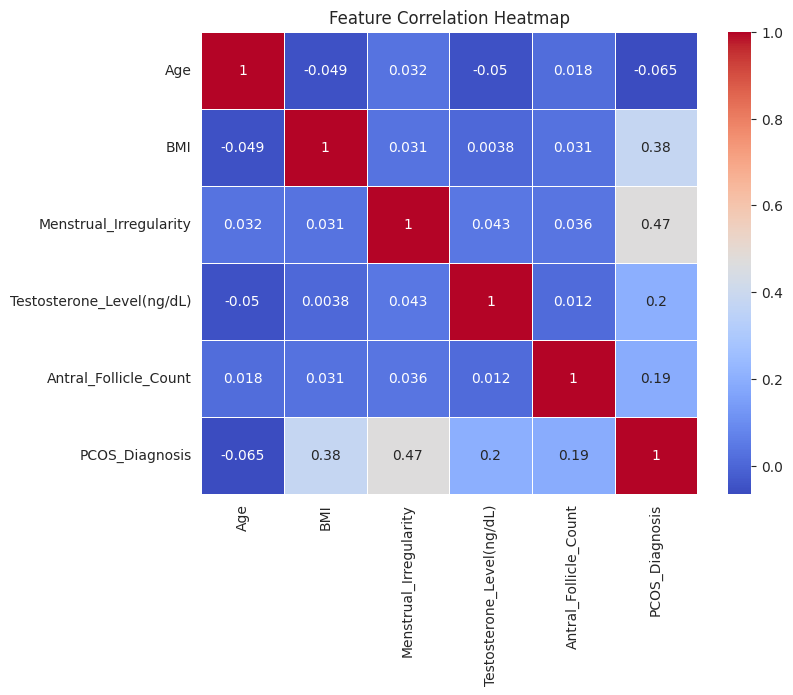

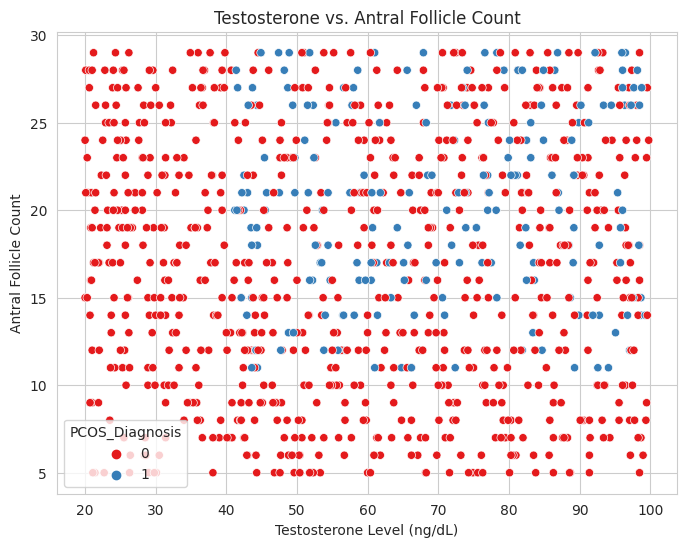

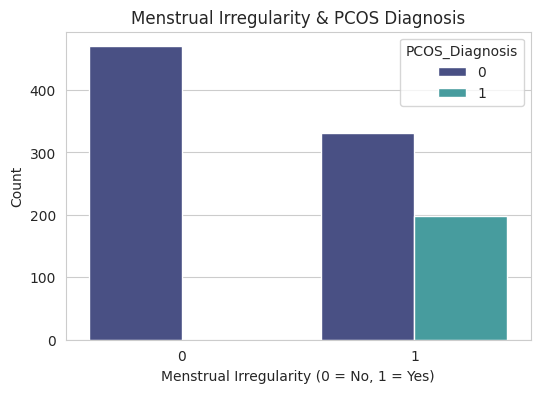

In [13]:
# Set style
sns.set_style("whitegrid")

# Distribution of Age & BMI
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=20, kde=True, color="darkblue")
plt.title("Age Distribution")

plt.subplot(1, 2, 2)
sns.histplot(df['BMI'], bins=20, kde=True, color="darkgreen")
plt.title("BMI Distribution")
plt.show()

# Boxplot of PCOS Diagnosis vs. Features
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['PCOS_Diagnosis'], y=df['Testosterone_Level(ng/dL)'], palette="coolwarm")
plt.xlabel("PCOS Diagnosis (0 = No, 1 = Yes)")
plt.ylabel("Testosterone Level (ng/dL)")
plt.title("Testosterone Levels in PCOS vs. Non-PCOS Patients")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8, 6))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Scatter plot: Testosterone vs. Antral Follicle Count
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Testosterone_Level(ng/dL)'], y=df['Antral_Follicle_Count'], hue=df['PCOS_Diagnosis'], palette="Set1")
plt.xlabel("Testosterone Level (ng/dL)")
plt.ylabel("Antral Follicle Count")
plt.title("Testosterone vs. Antral Follicle Count")
plt.show()

# Bar Chart: Menstrual Irregularity vs. PCOS
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Menstrual_Irregularity'], hue=df['PCOS_Diagnosis'], palette="mako")
plt.xlabel("Menstrual Irregularity (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Menstrual Irregularity & PCOS Diagnosis")
plt.show()

## EDA

In [14]:
# For example, convert the PCOS_Diagnosis column to categorical for modeling purposes
df['PCOS_Diagnosis'] = df['PCOS_Diagnosis'].astype('category')

print('Data cleaning completed. Check data types:')
print(df.dtypes)

Data cleaning completed. Check data types:
Age                             int64
BMI                           float64
Menstrual_Irregularity          int64
Testosterone_Level(ng/dL)     float64
Antral_Follicle_Count           int64
PCOS_Diagnosis               category
dtype: object


## ML ALgorithms

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [18]:
features = ['Age', 'BMI', 'Menstrual_Irregularity', 'Testosterone_Level(ng/dL)', 'Antral_Follicle_Count']
X = df[features]
y = LabelEncoder().fit_transform(df['PCOS_Diagnosis'])

In [19]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
random_forest = RandomForestClassifier()

random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

print(f"Random Forest accuracy is {accuracy_score(y_test, y_pred)*100}%")

Random Forest accuracy is 99.0%


In [24]:
y_test


array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [25]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1], dtype=int64)